In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

import auditory_cortex.helpers as helpers
import auditory_cortex.analysis.config as config
from auditory_cortex.dataset import Neural_Data


data_dir = '/scratch/gilbreth/ahmedb/auditory_cortex'


In [2]:
a = np.random.randn(20, 64, 12)

In [6]:
b = np.min(a, axis=0)

In [4]:
b.shape

(64, 12)

### Neural Data: loading the inter-trial neural activity 

In [2]:
sub = '200206'
dataset = Neural_Data(data_dir, sub)

In [4]:
np.unique(dataset.trials[32].timitStimcode)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [10]:
for s in range(1, 500):
    if dataset.get_trials(s).shape[0] > 1:
        print(f"{s}: {dataset.get_trials(s).shape[0]}")

12: 11
13: 11
32: 11
43: 11
56: 11
163: 11
212: 11
218: 11
287: 11
308: 11


In [12]:
np.unique(dataset.spikes[32].timitStimcode)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [16]:
dataset.sentdet[0].sentId

1

In [124]:
dataset.sentdet[0]._fieldnames

['name',
 'sound',
 'soundf',
 'dataf',
 'aud',
 'duration',
 'befaft',
 'sentId',
 'soundOns',
 'onsOff',
 'syltype',
 'phnmatonset',
 'phnmat',
 'sentence_onset',
 'formants',
 'F13P',
 'F23P',
 'F1Trans',
 'F2Trans',
 'phnfeat',
 'phnfeatonset',
 'sylOns',
 'syllableNumber',
 'pause',
 'stress',
 'vowelTimes',
 'vowel',
 'vowelStress',
 'frmMedOns',
 'frmMedVal',
 'vowelId',
 'loudnessallNames',
 'loudness',
 'loudnessExtVal',
 'loudnessExtLoc',
 'loudnessRelExtLoc',
 'loudnessall',
 'loudnessSentOns',
 'loudnessCycleDur',
 'loudnessSentIdlong',
 'loudnesscyclePeakPhn',
 'loudnessCycleId']

In [18]:
dataset.spikes[32]._fieldnames

['events',
 'spktimes',
 'stimlock',
 'amStimcode',
 'fmStimcode',
 'dmrStimcode',
 'mVocStimcode',
 'timitStimcode',
 'trial']

In [125]:
dataset.trials[32]._fieldnames

['stimon',
 'amStimcode',
 'fmStimcode',
 'dmrStimcode',
 'mVocStimcode',
 'timitStimcode']

In [85]:
dataset.spikes[32].events.shape

(205333, 21)

In [29]:
trial_id = 0
np.where(dataset.spikes[32].trial == trial_id)[0].shape

(58,)

In [ ]:
np.where(dataset.trial == trial_id)[0]

In [77]:
sent=1
np.where(dataset.trials[32].timitStimcode == sent)[0]

array([1783])

In [80]:
sent=1
np.where(dataset.spikes[32].timitStimcode == sent)[0]

array([158134, 158135, 158136, 158137, 158138, 158139, 158140, 158141,
       158142, 158143, 158144, 158145, 158146, 158147, 158148, 158149,
       158150, 158151, 158152, 158153, 158154, 158155, 158156, 158157,
       158158, 158159, 158160, 158161, 158162, 158163, 158164, 158165,
       158166, 158167, 158168, 158169, 158170, 158171, 158172, 158173,
       158174, 158175, 158176, 158177, 158178, 158179, 158180, 158181,
       158182, 158183, 158184, 158185, 158186, 158187, 158188, 158189,
       158190, 158191, 158192, 158193, 158194, 158195, 158196, 158197,
       158198, 158199, 158200, 158201, 158202, 158203, 158204, 158205,
       158206, 158207, 158208, 158209, 158210, 158211, 158212, 158213,
       158214, 158215, 158216, 158217, 158218, 158219, 158220, 158221,
       158222, 158223, 158224, 158225, 158226, 158227, 158228, 158229,
       158230, 158231, 158232, 158233, 158234, 158235, 158236, 158237,
       158238, 158239, 158240, 158241, 158242, 158243, 158244, 158245,
      

In [81]:
sent=2
np.where(dataset.spikes[32].timitStimcode == sent)[0]

array([164567, 164568, 164569, 164570, 164571, 164572, 164573, 164574,
       164575, 164576, 164577, 164578, 164579, 164580, 164581, 164582,
       164583, 164584, 164585, 164586, 164587, 164588, 164589, 164590,
       164591, 164592, 164593, 164594, 164595, 164596, 164597, 164598,
       164599, 164600, 164601, 164602, 164603, 164604, 164605, 164606,
       164607, 164608, 164609, 164610, 164611, 164612, 164613, 164614,
       164615, 164616, 164617, 164618, 164619, 164620, 164621, 164622,
       164623, 164624, 164625, 164626, 164627, 164628, 164629, 164630,
       164631, 164632, 164633, 164634, 164635, 164636, 164637, 164638,
       164639, 164640, 164641, 164642, 164643, 164644, 164645, 164646,
       164647, 164648, 164649, 164650, 164651, 164652, 164653, 164654,
       164655, 164656, 164657, 164658, 164659, 164660, 164661, 164662,
       164663, 164664, 164665, 164666, 164667, 164668, 164669, 164670,
       164671, 164672, 164673, 164674, 164675, 164676, 164677, 164678,
      

In [45]:
dataset.spikes[32].trial[101]

1.0

In [106]:
dataset.get_trials(sent=5)

array([2037])

In [107]:
dataset.trials[32]._fieldnames

['stimon',
 'amStimcode',
 'fmStimcode',
 'dmrStimcode',
 'mVocStimcode',
 'timitStimcode']

In [123]:
tr = dataset.get_trials(sent=9)
print(tr)
dataset.trials[32].stimon[tr]

[1972]


array([5145.76485])

In [49]:
dataset.get_trials(sent=1)

array([1784])

In [58]:
tr = 1784
np.where(dataset.spikes[32].trial == tr)

(array([158134, 158135, 158136, 158137, 158138, 158139, 158140, 158141,
        158142, 158143, 158144, 158145, 158146, 158147, 158148, 158149,
        158150, 158151, 158152, 158153, 158154, 158155, 158156, 158157,
        158158, 158159, 158160, 158161, 158162, 158163, 158164, 158165,
        158166, 158167, 158168, 158169, 158170, 158171, 158172, 158173,
        158174, 158175, 158176, 158177, 158178, 158179, 158180, 158181,
        158182, 158183, 158184, 158185, 158186, 158187, 158188, 158189,
        158190, 158191, 158192, 158193, 158194, 158195, 158196, 158197,
        158198, 158199, 158200, 158201, 158202, 158203, 158204, 158205,
        158206, 158207, 158208, 158209, 158210, 158211, 158212, 158213,
        158214, 158215, 158216, 158217, 158218, 158219, 158220, 158221,
        158222, 158223, 158224, 158225, 158226, 158227, 158228, 158229,
        158230, 158231, 158232, 158233, 158234, 158235, 158236, 158237,
        158238, 158239, 158240, 158241, 158242, 158243, 158244, 

In [60]:
tr = 1826
spike_indeces = np.where(dataset.spikes[32].trial == tr)[0]

In [64]:
dataset.spikes[32].stimlock[spike_indeces]

array([0.11445, 0.17565, 0.1803 , 0.18495, 0.1882 , 0.18955, 0.1905 ,
       0.1918 , 0.1931 , 0.19315, 0.1957 , 0.1981 , 0.1982 , 0.19985,
       0.2014 , 0.205  , 0.2071 , 0.20715, 0.20955, 0.2118 , 0.21345,
       0.21485, 0.21645, 0.2369 , 0.24935, 0.2748 , 0.2843 , 0.31485,
       0.3164 , 0.3189 , 0.32135, 0.33035, 0.3463 , 0.364  , 0.40225,
       0.4305 , 0.4374 , 0.6093 , 0.6918 , 0.72725, 0.7373 , 0.7385 ,
       0.7412 , 0.7521 , 0.75215, 0.80585, 0.81275, 0.81605, 0.81615,
       0.8195 , 0.8225 , 0.8256 , 0.8263 , 0.83325, 0.83445, 0.84025,
       0.8458 , 0.86725, 0.8741 , 0.87415, 0.87545, 0.87645, 0.87855,
       0.88775, 0.88875, 0.892  , 0.8984 , 0.9029 , 0.9051 , 0.90795,
       0.9098 , 0.92045, 0.92125, 0.93495, 0.9392 , 0.96765, 0.9711 ,
       0.97115, 0.9778 , 1.00085, 1.01455, 1.0169 , 1.02155, 1.09055,
       1.09165, 1.1018 , 1.1034 , 1.105  , 1.10835, 1.1143 , 1.1172 ,
       1.1183 , 1.13175, 1.1331 , 1.13315, 1.14145, 1.1475 , 1.15815,
       1.16945, 1.29

In [41]:
np.unique(dataset.spikes[32].mVocStimcode)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### convert 'png' image to 'svg'

In [2]:
I = Image.open(os.path.join(config.svg_files,'monkey_brain.png'))

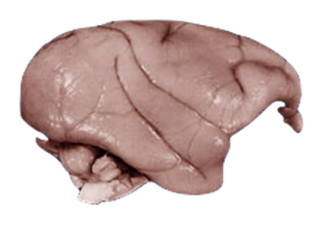

In [6]:
plt.imshow(I)
plt.axis('off')
plt.savefig(os.path.join(config.svg_files, 'monkey_brain.svg'), dpi=1200)

### regression object signals..

In [7]:
reg_obj = helpers.get_regression_obj(load_features=True)

loading weights from: /depot/jgmakin/data/auditory_cortex/pretrained_weights/w2l_modified/Wav2letter-epoch=024-val_loss=0.37.ckpt
Regression object...
Creating regression obj for: 'wav2letter_modified'


KeyboardInterrupt: 

In [3]:
aud = reg_obj.dataset.audio(sent=12)

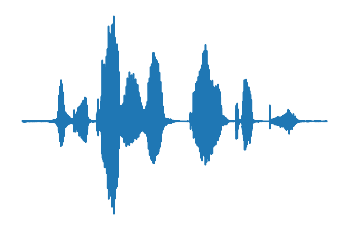

In [23]:
plt.plot(aud)
plt.axis('off')
plt.savefig(os.path.join(config.svg_files, 'input_waveform.svg'))

In [19]:
features = reg_obj.load_features(sents=[12], numpy=True)

Loading ANN features at bin-width: 20


In [20]:
type(features[0][:,0])

numpy.ndarray

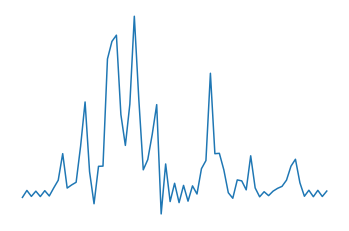

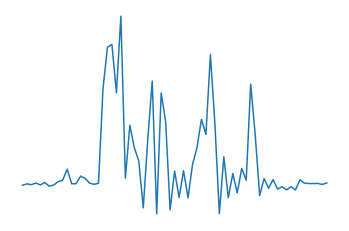

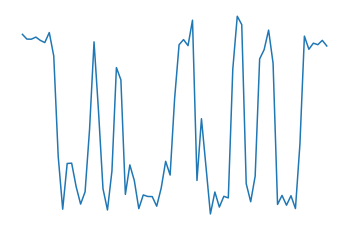

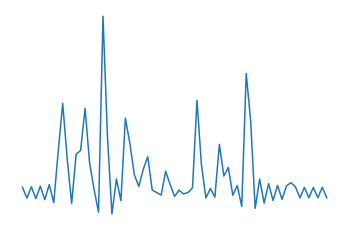

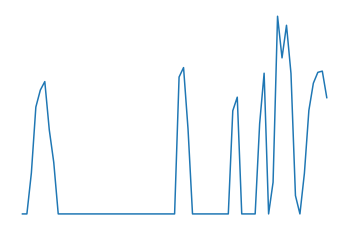

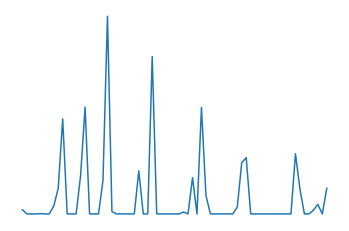

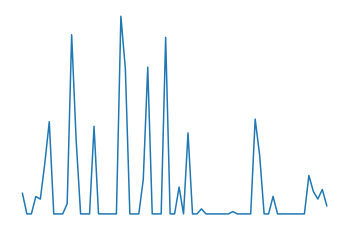

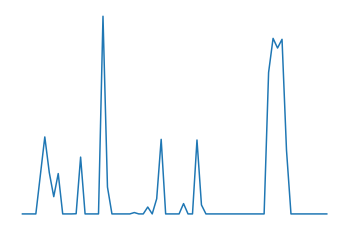

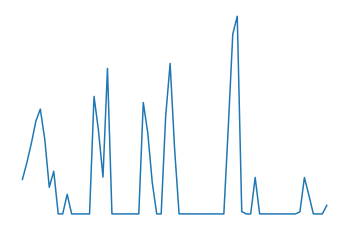

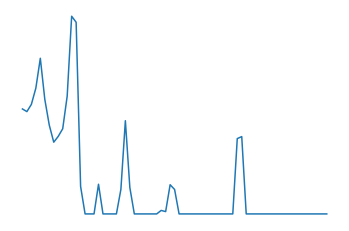

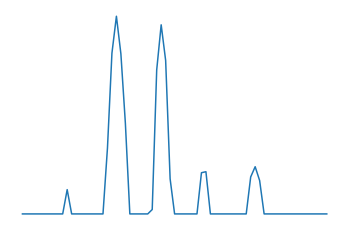

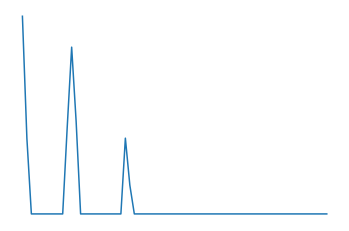

In [30]:
layer = 1
for layer in range(12):
    plt.plot(features[layer][:,0])
    plt.axis('off')
    # plt.savefig(os.path.join(config.svg_files, f'layer_{layer}_features.svg'))
    plt.show()